In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# Load dataset

In [77]:
# Load the dataset
data = pd.read_csv('group/Car_Insurance_Claim.csv')
data_claim_not = data[data['OUTCOME'] == 0]
data_claim_yes = data[data['OUTCOME'] == 1]

# Check for missing values initially
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [78]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [79]:
number_columns = [
    "CREDIT_SCORE",
    "ANNUAL_MILEAGE",
    "SPEEDING_VIOLATIONS",
    "PAST_ACCIDENTS",
    "DUIS",
]
categorical_columns = [
    "POSTAL_CODE",
    "CHILDREN",
    "MARRIED",
    "VEHICLE_OWNERSHIP",
    "AGE",
    "GENDER",
    "RACE",
    "DRIVING_EXPERIENCE",
    "EDUCATION",
    "INCOME",
    "VEHICLE_YEAR",
    "VEHICLE_TYPE",
    "OUTCOME",
]

# EDA

## Distribution of numerical columns

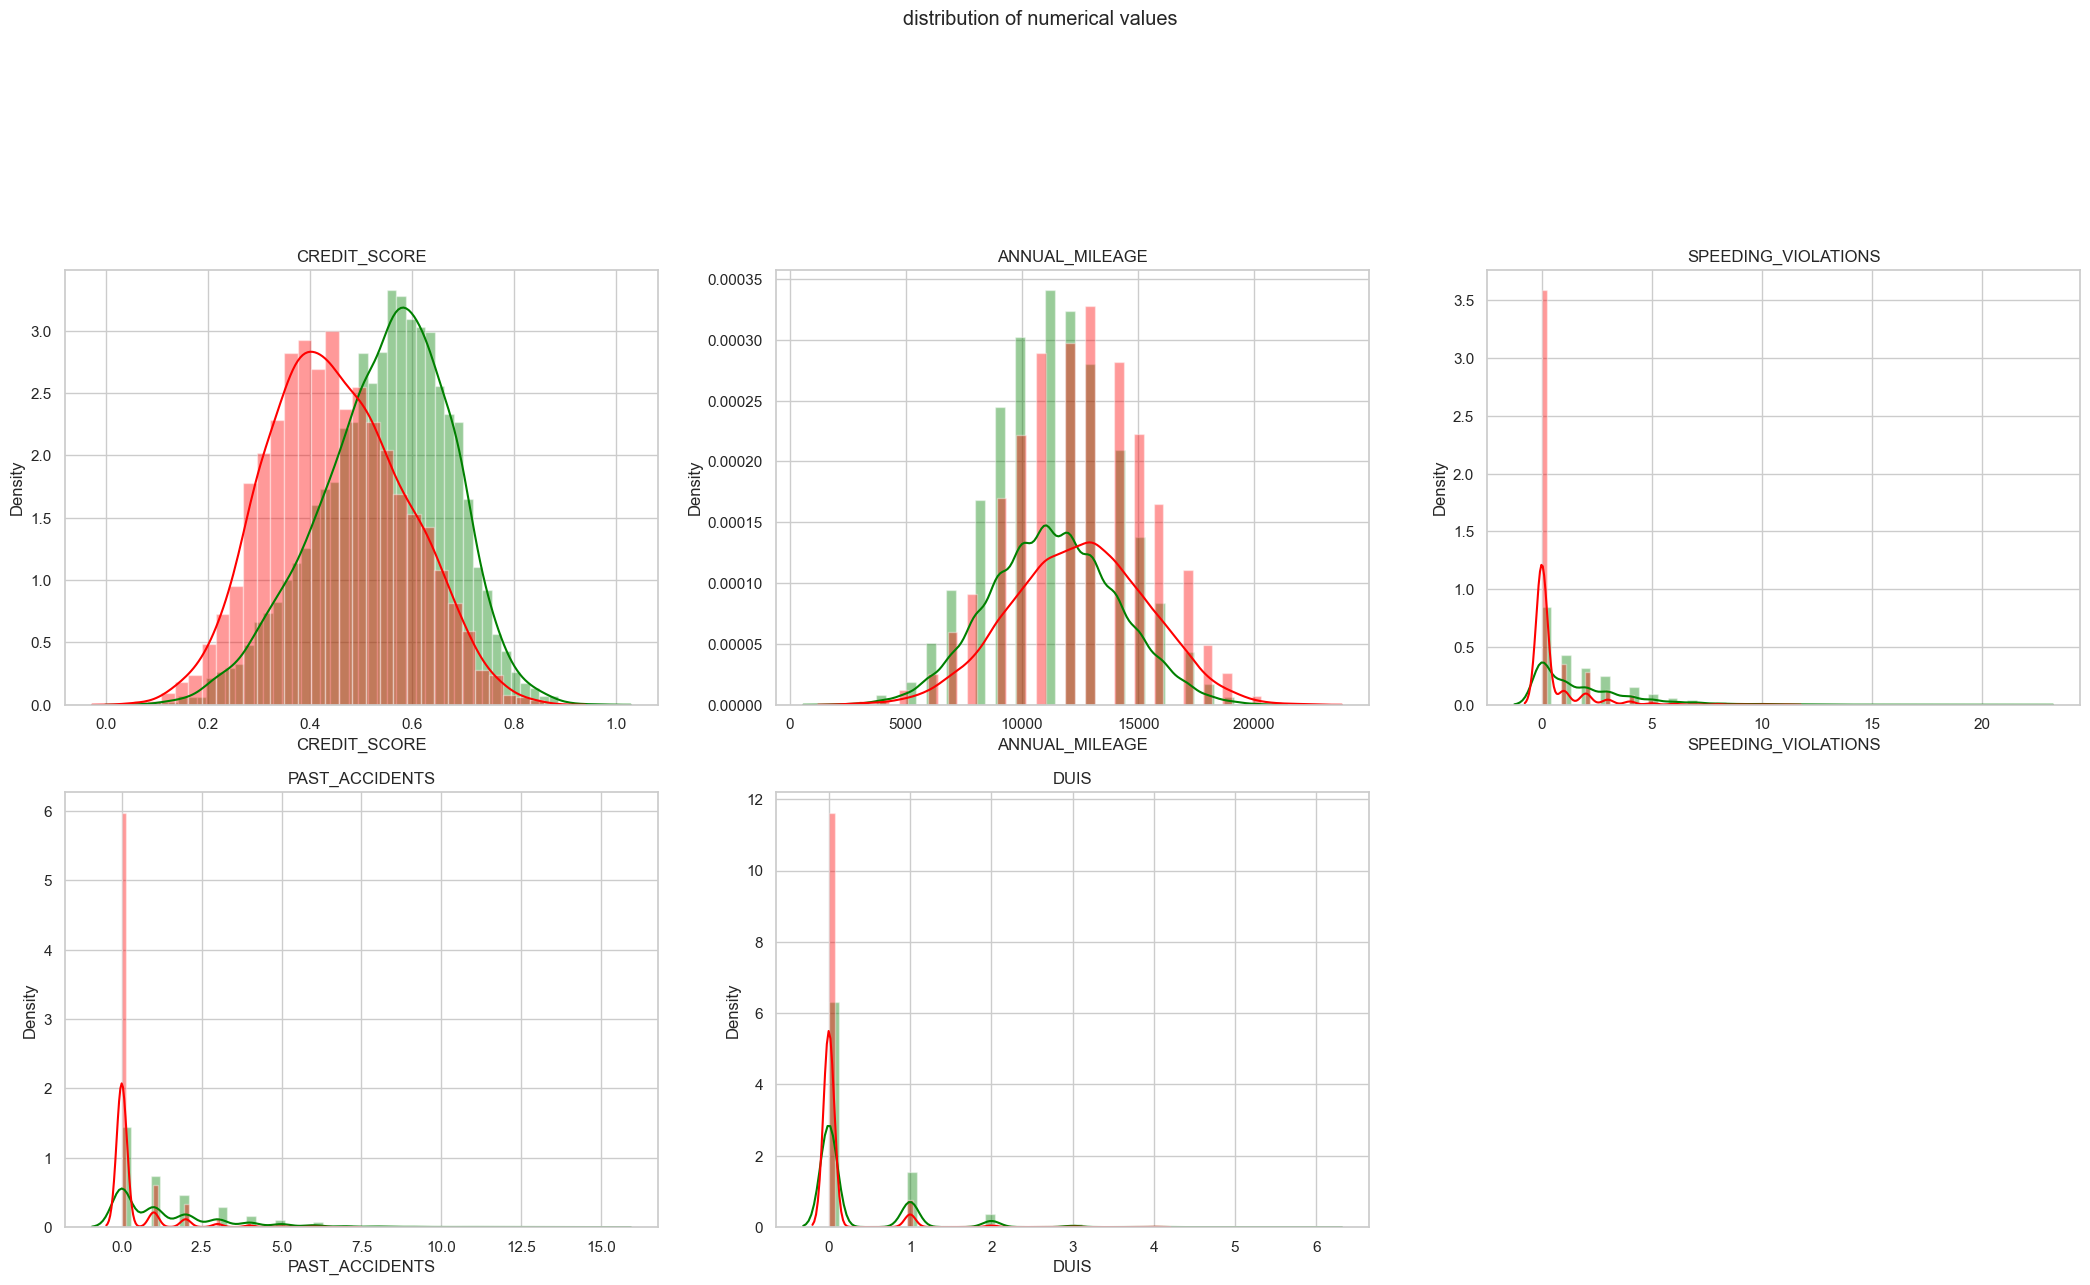

In [80]:
# make a plot for each numerical column, where "green" is for is_claim and "red" is for is_not_claim
import warnings
warnings.filterwarnings("ignore")

_ = plt.figure(figsize=(26,26))
_ = plt.tight_layout()
_ = plt.suptitle("distribution of numerical values")


for k, col in enumerate(data.loc[:, number_columns], start=1):
    ax = plt.subplot(4, 3, k)
    _ = sns.distplot(data_claim_not[col], color="green", ax=ax, label="claim: NO")
    _ = sns.distplot(data_claim_yes[col], color="red", ax=ax, label="claim: YES")
    _ = plt.title(col)

## Distribution of categorical columns

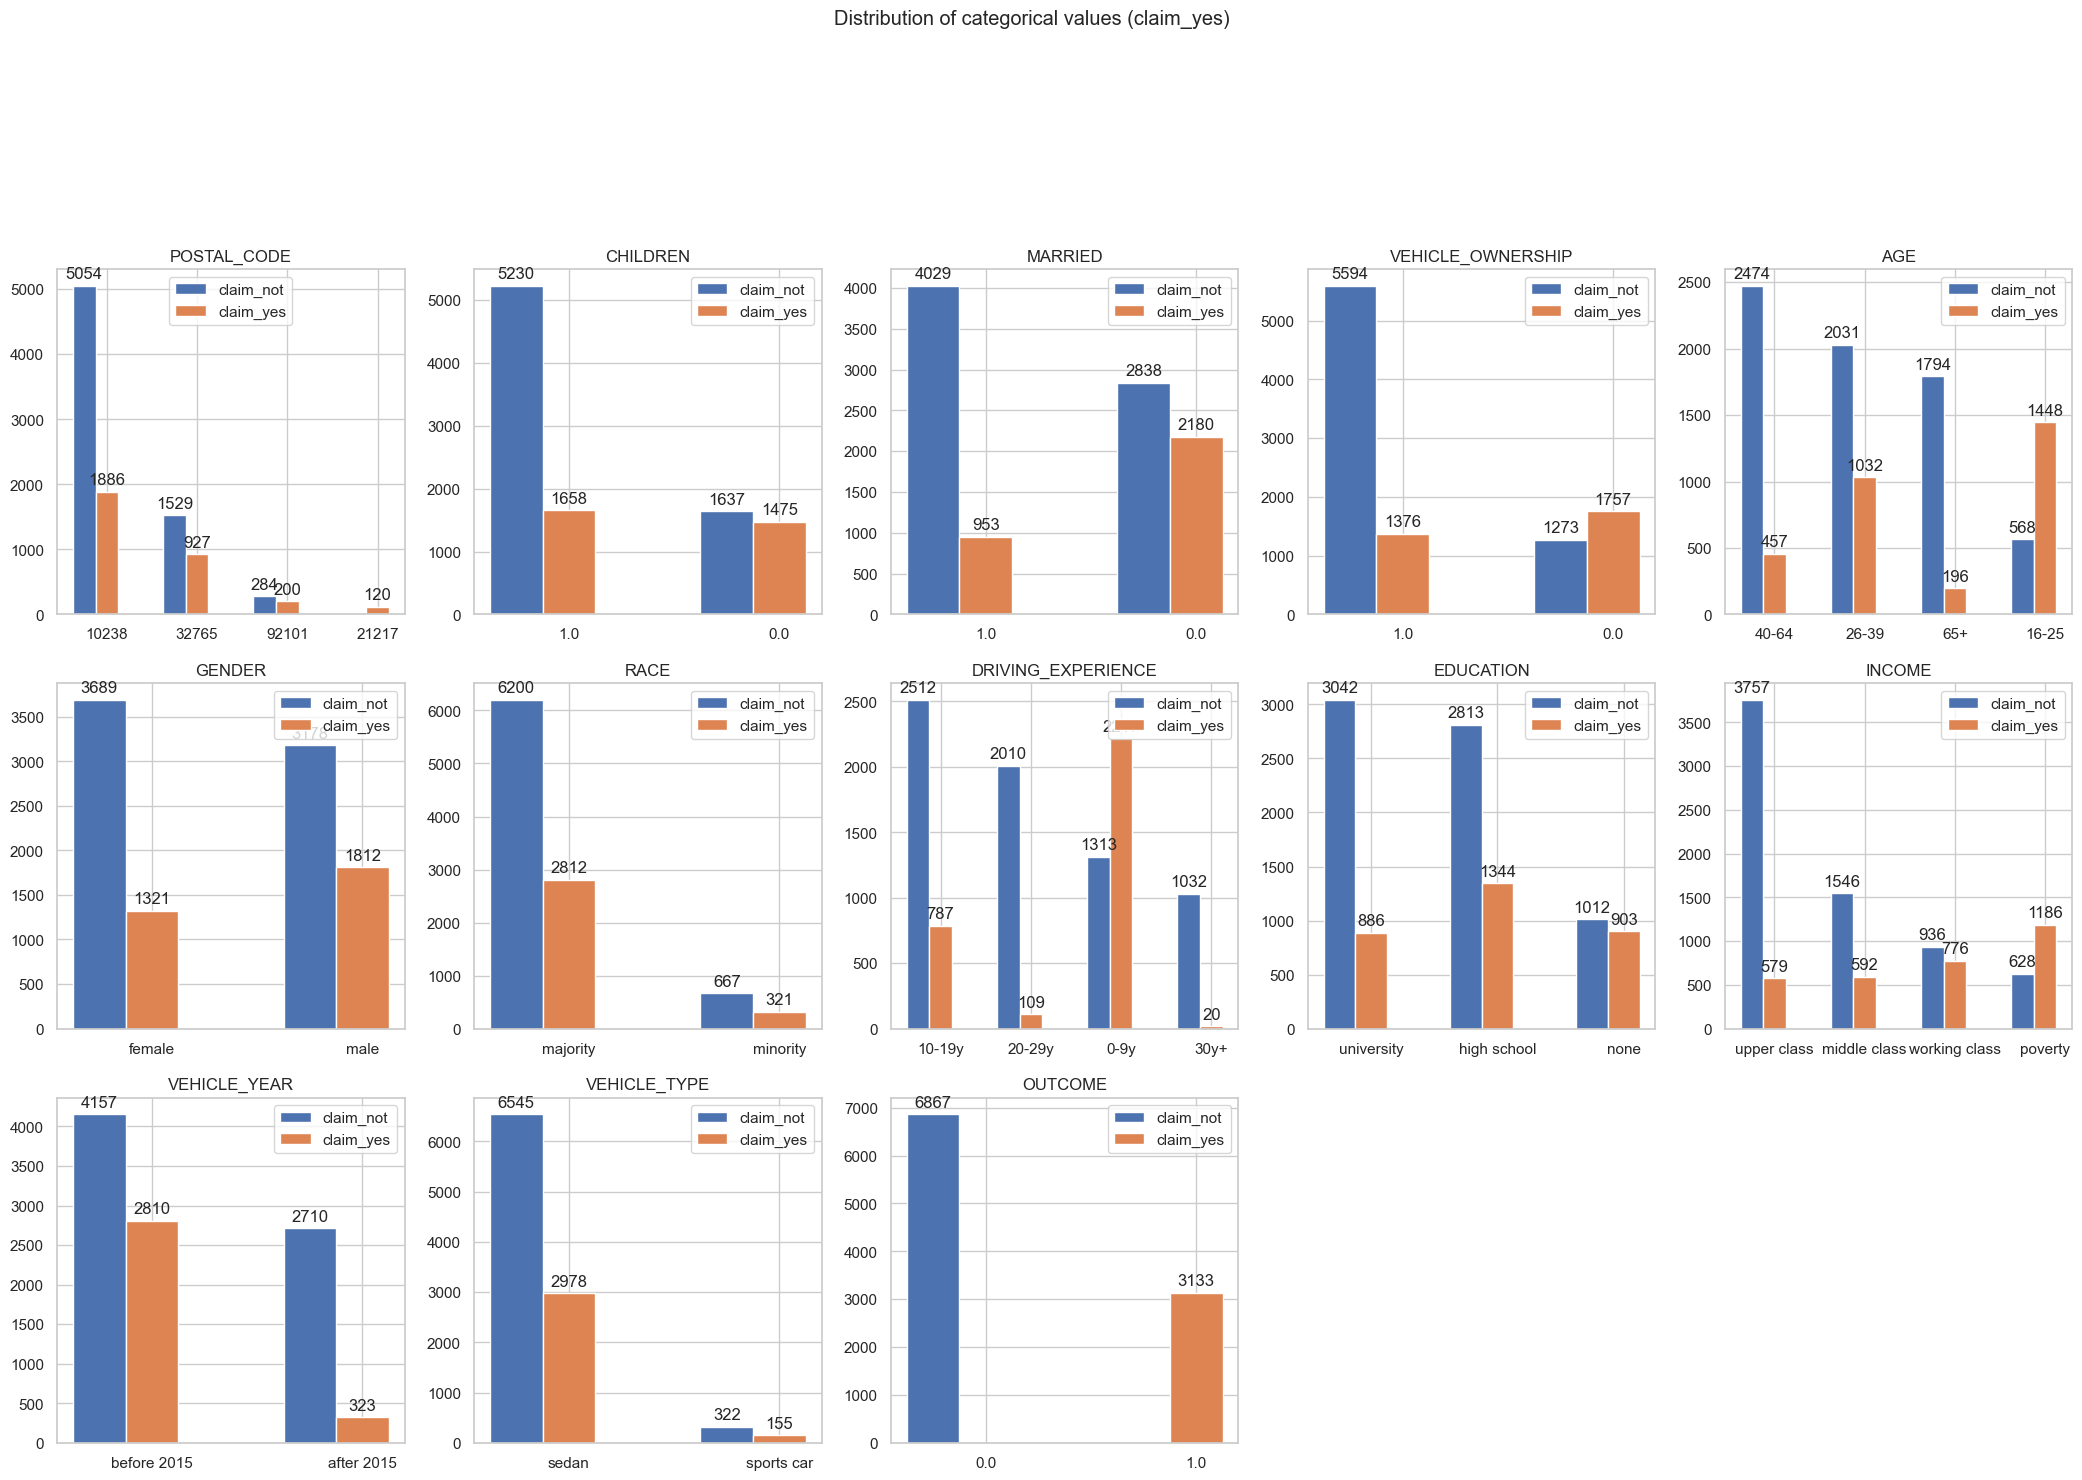

In [81]:
_ = plt.figure(figsize=(26,26))
_ = plt.tight_layout()
_ = plt.suptitle("Distribution of categorical values (claim_yes)")
for k, col in enumerate(data.loc[:, categorical_columns], start=1):
    ax = plt.subplot(5, 5, k)

    percent_df = pd.concat([
        data_claim_not[col].value_counts(),
        data_claim_yes[col].value_counts(),
    ], axis=1)
    percent_df.columns = ["claim_not", "claim_yes"]

    x = np.arange(len(percent_df))
    width = 0.25
    multiplier = 0
    for attribute, measurement in percent_df.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement.values, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    _ = plt.title(col)
    _ = plt.legend()
    _ = ax.set_xticks(x + width, percent_df.index)


## Visualize the columns with missing values

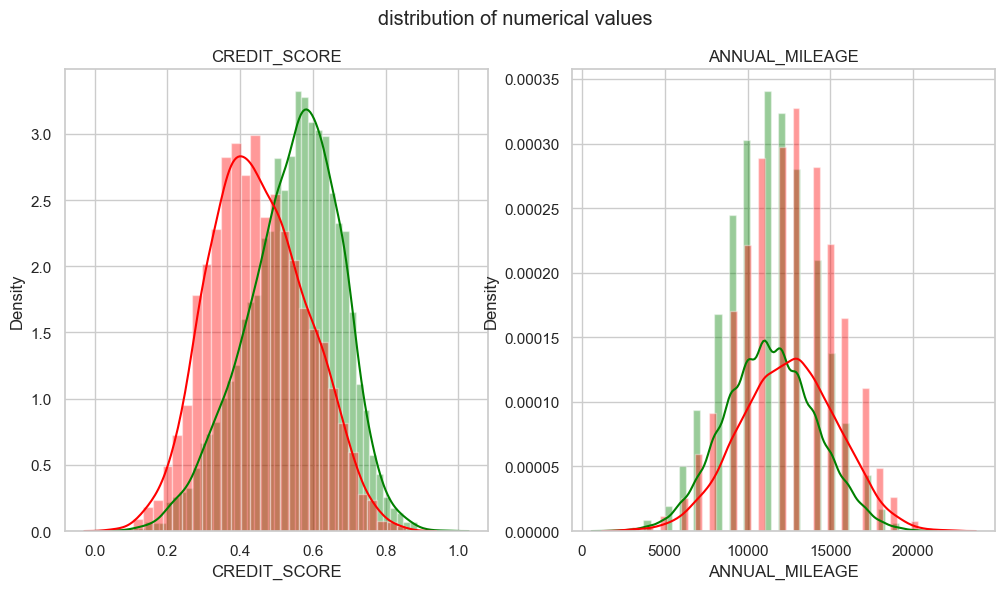

In [82]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

_ = plt.figure(figsize=(12,6))
_ = plt.tight_layout()
_ = plt.suptitle("distribution of numerical values")

for k, col in enumerate(data.loc[:, ["CREDIT_SCORE", "ANNUAL_MILEAGE"]], start=1):
    ax = plt.subplot(1, 2, k)
    _ = sns.distplot(data_claim_not[col], color="green", ax=ax, label="claim: NO")
    _ = sns.distplot(data_claim_yes[col], color="red", ax=ax, label="claim: YES")
    _ = plt.title(col)

## Impute missing values

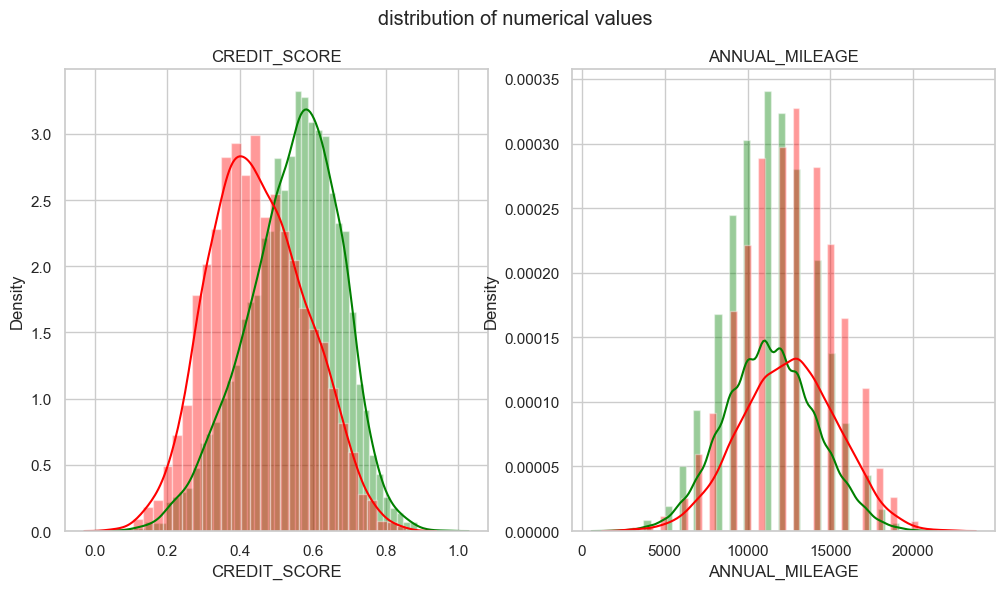

In [83]:

# imputer = KNNImputer(n_neighbors=5)
imputer = SimpleImputer(strategy='median')
data[['CREDIT_SCORE', 'ANNUAL_MILEAGE']] = imputer.fit_transform(data[['CREDIT_SCORE', 'ANNUAL_MILEAGE']])

_ = plt.figure(figsize=(12,6))
_ = plt.tight_layout()
_ = plt.suptitle("distribution of numerical values")

for k, col in enumerate(data.loc[:, ["CREDIT_SCORE", "ANNUAL_MILEAGE"]], start=1):
    ax = plt.subplot(1, 2, k)
    _ = sns.distplot(data_claim_not[col], color="green", ax=ax, label="claim: NO")
    _ = sns.distplot(data_claim_yes[col], color="red", ax=ax, label="claim: YES")
    _ = plt.title(col)

## Correlation

In [85]:
data = data.drop(['ID', 'POSTAL_CODE'], axis=1)
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category').cat.codes

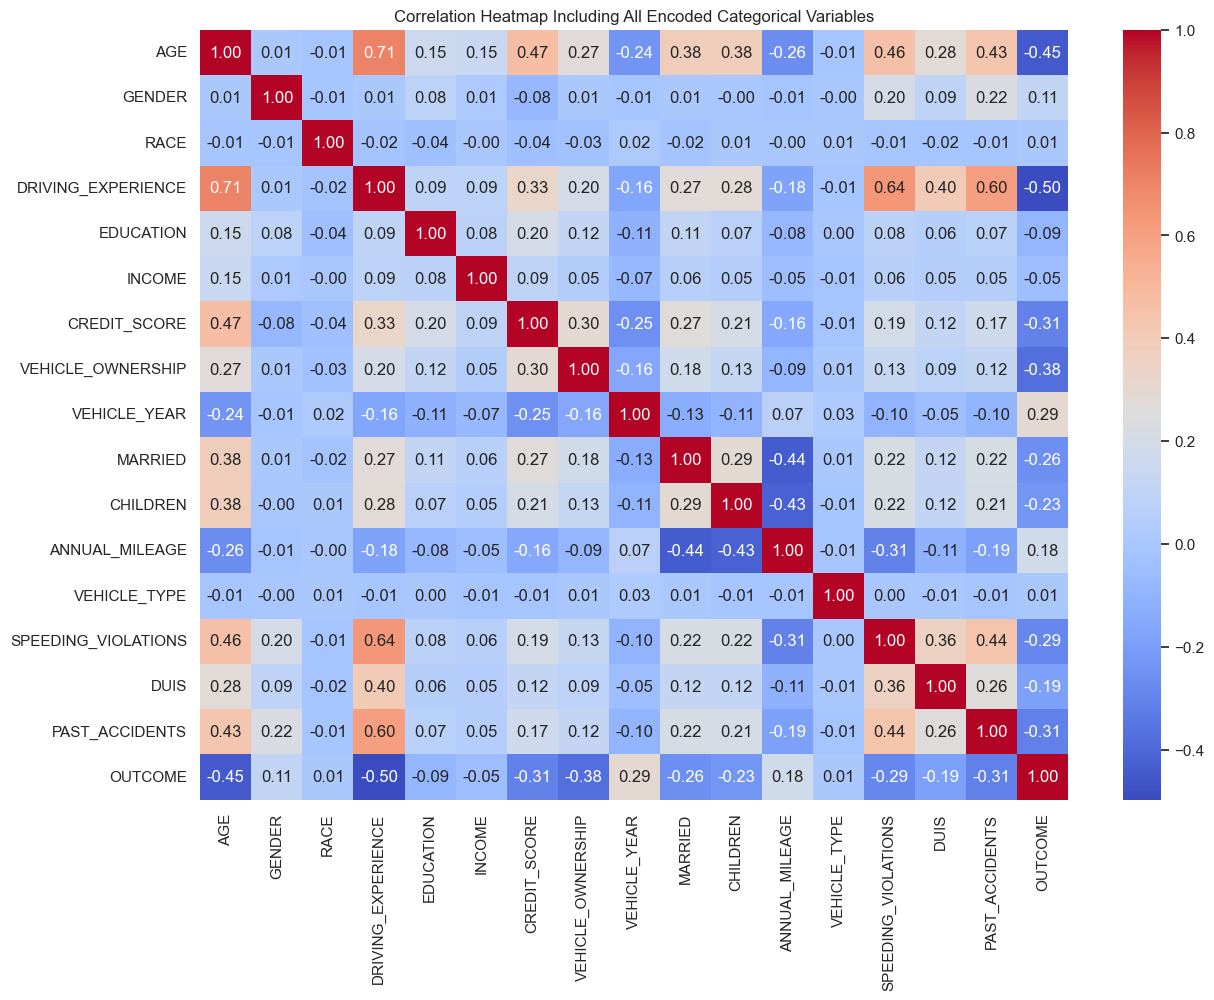

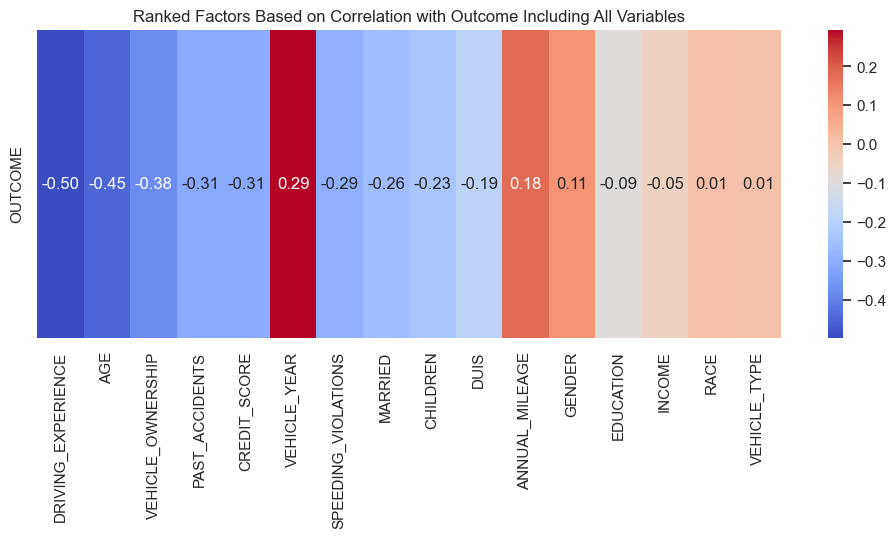

In [86]:
correlation_matrix = data.corr()

# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap Including All Encoded Categorical Variables')
plt.show()

# Isolating the 'OUTCOME' correlation row/column, removing the 'OUTCOME' correlation with itself
outcome_correlation = correlation_matrix['OUTCOME'].drop('OUTCOME').sort_values()

# Visualizing the ranked factors based on their correlation with 'OUTCOME'
plt.figure(figsize=(12, 4))
sns.heatmap(pd.DataFrame(outcome_correlation.sort_values(ascending=False, key=abs)).T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ranked Factors Based on Correlation with Outcome Including All Variables')
plt.show()

# Preprocessing

In [49]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'data' is your DataFrame
data_full_encoded = data.copy()

# List of categorical variables
categorical_vars = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']

# Initialize a dictionary to hold the mappings
category_mappings = {}

# Loop through each categorical variable
for var in categorical_vars:
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    # Fit and transform the data for each variable
    data_full_encoded[var] = label_encoder.fit_transform(data_full_encoded[var])
    # Store the mapping of encoded labels to original labels
    category_mappings[var] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# category_mappings dictionary contains the mappings for each categorical variable
for var, mapping in category_mappings.items():
    print(f"Mapping for {var}: {mapping}")


Mapping for AGE: {0: 0, 1: 1, 2: 2, 3: 3}
Mapping for GENDER: {0: 0, 1: 1}
Mapping for RACE: {0: 0, 1: 1}
Mapping for DRIVING_EXPERIENCE: {0: 0, 1: 1, 2: 2, 3: 3}
Mapping for EDUCATION: {0: 0, 1: 1, 2: 2}
Mapping for INCOME: {0: 0, 1: 1, 2: 2, 3: 3}
Mapping for VEHICLE_YEAR: {0: 0, 1: 1}
Mapping for VEHICLE_TYPE: {0: 0, 1: 1}


In [50]:
from scipy.stats import chi2_contingency

# List of original categorical variables
categorical_vars = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME','VEHICLE_YEAR', 'VEHICLE_TYPE']

# Perform Chi-Square Test for each categorical variable
chi2_results = {}
for var in categorical_vars:
    contingency_table = pd.crosstab(data_full_encoded[var], data_full_encoded['OUTCOME'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[var] = p

# Displaying the p-values from the Chi-Square Tests
chi2_results

{'AGE': 0.0,
 'GENDER': 1.0265076976475116e-26,
 'RACE': 0.4284492098169054,
 'DRIVING_EXPERIENCE': 0.0,
 'EDUCATION': 4.5774621287820995e-80,
 'INCOME': 0.0,
 'VEHICLE_YEAR': 6.485679760327193e-190,
 'VEHICLE_TYPE': 0.6090479538657486}

In [88]:
# drop race and vehicle_type since they are not significant. And drop postal_code since we need to apply this model to people in different residence
data_full_encoded = data_full_encoded.drop(['RACE','VEHICLE_TYPE'], axis=1)


KeyError: "['RACE', 'VEHICLE_TYPE'] not found in axis"

In [89]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier


# Split the data into features and target variable
X = data_full_encoded.drop('OUTCOME', axis=1)  # Assuming 'OUTCOME' is the target column
y = data_full_encoded['OUTCOME']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure all column names are of type string
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Proceed with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Make sure the resampled training set also has column names as strings
X_train_smote.columns = X_train_smote.columns.astype(str)


In [90]:
# Initialize the models
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
neural_network = MLPClassifier(max_iter=1000, random_state=42)
svc = make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))

# List of models for iteration
models = [logistic_regression, random_forest, decision_tree, gradient_boosting, neural_network, svc]

# Model evaluation
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, ROC AUC: {roc_auc:.4f}")

LogisticRegression - Accuracy: 0.8190, Precision: 0.6744, Recall: 0.8278, ROC AUC: 0.8214
RandomForestClassifier - Accuracy: 0.8155, Precision: 0.7075, Recall: 0.7109, ROC AUC: 0.7874
DecisionTreeClassifier - Accuracy: 0.7545, Precision: 0.6050, Recall: 0.6461, ROC AUC: 0.7254
GradientBoostingClassifier - Accuracy: 0.8380, Precision: 0.7229, Recall: 0.7915, ROC AUC: 0.8255
MLPClassifier - Accuracy: 0.5590, Precision: 0.4143, Recall: 0.9510, ROC AUC: 0.6642
Pipeline - Accuracy: 0.8315, Precision: 0.6995, Recall: 0.8199, ROC AUC: 0.8284


In [91]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a dictionary of models for ease of access
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "decision tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42),
    "Support Vector Machine": make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))
}

# Assuming X_train_smote, y_train_smote are your SMOTE-balanced training set
# and X_test, y_test are your testing set

# Perform cross-validation and print the mean accuracy for each model
for name, model in models.items():
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')  # 5-fold cross-validation
    print(f"{name} - Mean Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")


Logistic Regression - Mean Accuracy: 0.8242 (+/- 0.0087)
Random Forest - Mean Accuracy: 0.8628 (+/- 0.0389)
decision tree - Mean Accuracy: 0.8032 (+/- 0.0380)
Gradient Boosting - Mean Accuracy: 0.8540 (+/- 0.0330)
Neural Network - Mean Accuracy: 0.7146 (+/- 0.1068)
Support Vector Machine - Mean Accuracy: 0.8413 (+/- 0.0174)


[0.01449594 0.92715624 0.51602574 ... 0.01786032 0.01863214 0.9328401 ]


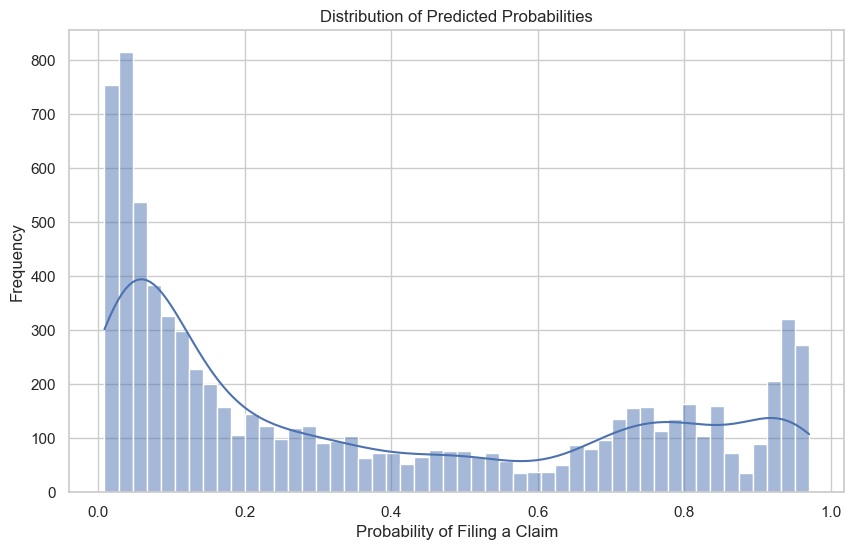

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming X_train_smote and y_train_smote are the balanced training dataset

# Train the Gradient Boosting Classifier on the entire balanced dataset
gradient_boosting_final = GradientBoostingClassifier(random_state=42)
gradient_boosting_final.fit(X_train_smote, y_train_smote)

import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities for the dataset used in training
# use the original dataset before SMOTE
probabilities = gradient_boosting_final.predict_proba(X_train)[:, 1]
print(probabilities)

# Visualize the distribution of probabilities
plt.figure(figsize=(10, 6))
sns.histplot(probabilities, bins=50, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability of Filing a Claim')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [56]:
#number of filing a claim in the original dataset
outcome_counts = data['OUTCOME'].value_counts()
probability_of_1 = outcome_counts[1] / outcome_counts.sum()
print(probability_of_1)

#pecentile of the probability of filling a claim
percentile_31 = np.percentile(probabilities, 31)
percentile_68 = np.percentile(probabilities, 68)

print(percentile_31)
print(percentile_68)


0.3133
0.08472220255543458
0.5578663003633729


In [57]:
# Function to predict risk group based on adjusted probability thresholds
def predict_risk_group(model, X_new):
    probabilities = model.predict_proba(X_new)[:, 1]  # Probability of the positive class (filing a claim)
    # Define risk groups based on the new probability thresholds
    risk_group = pd.cut(probabilities, bins=[0, 0.085, 0.55, 1], right=False, labels=['Low', 'Medium', 'High'])
    return risk_group

In [58]:
# Select the first 50 policyholders from the original dataset (adjust as needed based on preprocessing)
X_first_fifty = X_train.head(50)

# Predict risk groups for the first 50 policyholders
first_fifty_risk_groups = predict_risk_group(gradient_boosting_final, X_first_fifty)

# Display the risk groups
print(first_fifty_risk_groups)


['Low', 'High', 'Medium', 'Low', 'High', ..., 'Medium', 'High', 'Low', 'Low', 'High']
Length: 50
Categories (3, object): ['Low' < 'Medium' < 'High']


In [59]:
#count number of each group
risk_group_counts = first_fifty_risk_groups.value_counts()
print(risk_group_counts)

Low       14
Medium    21
High      15
Name: count, dtype: int64


    AGE  GENDER  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0     3       0                   3          0       2      0.545417   
1     1       1                   0          1       1      0.361876   
2     1       0                   0          2       0      0.535840   
3     2       0                   1          0       2      0.612545   
4     2       1                   0          2       0      0.474268   
5     1       0                   1          0       3      0.329007   
6     1       0                   1          1       3      0.477492   
7     1       0                   1          2       0      0.609474   
8     0       1                   0          2       1      0.525033   
9     1       0                   1          0       2      0.543178   
10    1       0                   1          0       3      0.423804   
11    2       0                   1          2       3      0.496030   
12    3       1                   1          2       2      0.75

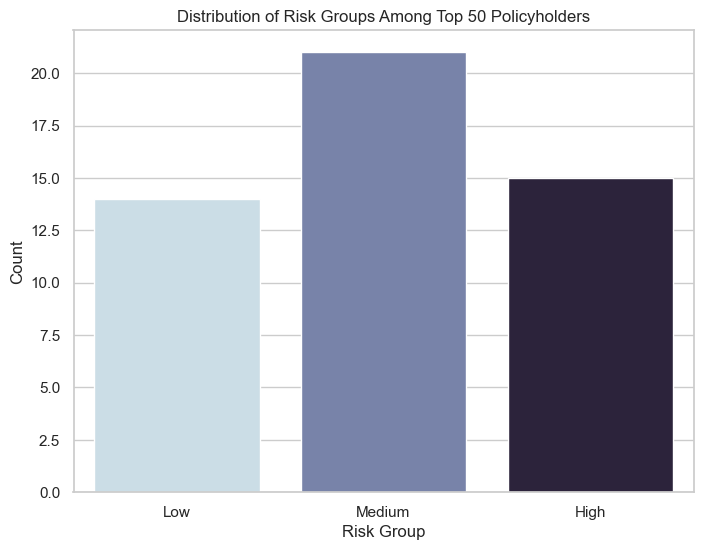

In [97]:
# Assuming 'X_first_fifty' contains the features of the top 50 policyholders
# and 'first_fifty_risk_groups' contains the predicted risk groups as shown in the results

# Convert the risk group predictions to a DataFrame for easier manipulation
risk_groups_df = pd.DataFrame(first_fifty_risk_groups, columns=['Risk Group'])

# Reset index on X_first_twenty to align with the index of risk_groups_df for concatenation
X_first_fifty_reset = X_first_fifty.reset_index(drop=True)

# Combine the profiles with their risk groups
top_50_profiles_with_risk = pd.concat([X_first_fifty_reset, risk_groups_df], axis=1)

# Display the table
print(top_50_profiles_with_risk)

import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each risk group
risk_group_counts = top_50_profiles_with_risk['Risk Group'].value_counts()

# Plot the distribution of risk groups
plt.figure(figsize=(8, 6))
sns.barplot(x=risk_group_counts.index, y=risk_group_counts.values, palette="ch:s=.25,rot=-.25")

#palette='Blues'
plt.title('Distribution of Risk Groups Among Top 50 Policyholders')
plt.xlabel('Risk Group')
plt.ylabel('Count')
plt.show()


In [61]:
# generate three new policholders

profiles = pd.DataFrame({
    'AGE': [1, 2, 0],  # Encoded ages
    'GENDER': [1, 0, 1],
    'DRIVING_EXPERIENCE': [1, 2, 0],
    'EDUCATION': [2, 0, 1],
    'INCOME': [0, 1, 2],
    'CREDIT_SCORE': [0.6, 0.8, 0.5],
    'VEHICLE_OWNERSHIP': [1, 1, 0],
    'VEHICLE_YEAR': [1, 0, 0],
    'MARRIED': [1, 1, 0],
    'CHILDREN': [1, 0, 0],
    'ANNUAL_MILEAGE': [12000, 15000, 10000],
    'SPEEDING_VIOLATIONS': [2, 0, 1],
    'DUIS': [1, 0, 0],
    'PAST_ACCIDENTS': [1, 1, 0]
})


In [62]:
risk_groups_3 = predict_risk_group(gradient_boosting_final, profiles)
print(risk_groups_3)


['Medium', 'Low', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']
